## Setup environment

In [1]:
!python -c "import monai" || pip install -q "monai-weekly[nibabel]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

In [2]:
pwd

'/home/xzhang/Projects/cellpose'

In [7]:
# function to generate random number
import glob
import tifffile
# input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4/images/*.tiff'
# output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4_augmented/images/'

# input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4/labels/*.tiff'
# output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4_augmented/labels/'

# input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4_2ga/images/*.tiff'
# output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4_2ga_augmented/images/'

# v5
# input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5/images/*.tiff'
# output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_augmented/images/'
# v5 with more labels

input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/*.tiff'
output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor_augmented/images/'

# input_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/labels/*.tiff'
# output_folder = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor_augmented/labels/'

input_files = glob.glob(input_folder)
print(input_files)

['/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/73_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/15_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/2%GA_RI_frame001_0.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/50uM_ZnCl_pH=7_RI_frame001_0.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/16_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/12_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/53_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/3_RI_time00h00m00s.tiff', '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_v5_nor/images/31_RI_time00h00m00s.tiff']


In [8]:
import os
import json
import shutil
import tempfile
import time
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nibabel as nib

img = tifffile.imread(input_files[0])

def rotate_image_3d(img, angle):
    out_image = np.zeros(img.shape, dtype=np.uint16)
    for i in range(img.shape[0]):
        out_image[i] = ndimage.rotate(img[i], angle,reshape=False)
        

    return out_image


for file in input_files:
    
    img0 = tifffile.imread(file)
    for dgr in range(0,180+1,45):
        file_name=os.path.basename(file).split('.')[0] + '_' + str(dgr) + '.tiff'
        img_cur = rotate_image_3d(img0, dgr)
        print(file_name, img_cur.shape)
        tifffile.imsave(output_folder + file_name, img_cur)

        

73_RI_time00h00m00s_0.tiff (96, 512, 512)


/tmp/ipykernel_85491/1330629702.py:31: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(output_folder + file_name, img_cur)


73_RI_time00h00m00s_45.tiff (96, 512, 512)
73_RI_time00h00m00s_90.tiff (96, 512, 512)
73_RI_time00h00m00s_135.tiff (96, 512, 512)
73_RI_time00h00m00s_180.tiff (96, 512, 512)
15_RI_time00h00m00s_0.tiff (96, 512, 512)
15_RI_time00h00m00s_45.tiff (96, 512, 512)
15_RI_time00h00m00s_90.tiff (96, 512, 512)
15_RI_time00h00m00s_135.tiff (96, 512, 512)
15_RI_time00h00m00s_180.tiff (96, 512, 512)
2%GA_RI_frame001_0_0.tiff (96, 512, 512)
2%GA_RI_frame001_0_45.tiff (96, 512, 512)
2%GA_RI_frame001_0_90.tiff (96, 512, 512)
2%GA_RI_frame001_0_135.tiff (96, 512, 512)
2%GA_RI_frame001_0_180.tiff (96, 512, 512)
50uM_ZnCl_pH=7_RI_frame001_0_0.tiff (96, 512, 512)
50uM_ZnCl_pH=7_RI_frame001_0_45.tiff (96, 512, 512)
50uM_ZnCl_pH=7_RI_frame001_0_90.tiff (96, 512, 512)
50uM_ZnCl_pH=7_RI_frame001_0_135.tiff (96, 512, 512)
50uM_ZnCl_pH=7_RI_frame001_0_180.tiff (96, 512, 512)
16_RI_time00h00m00s_0.tiff (96, 512, 512)
16_RI_time00h00m00s_45.tiff (96, 512, 512)
16_RI_time00h00m00s_90.tiff (96, 512, 512)
16_RI_time

14122 56381
(96, 512, 512) (96, 512, 512)


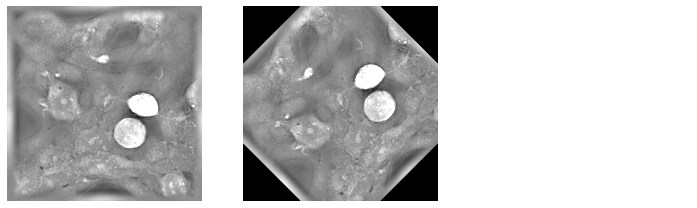

In [21]:
from scipy import ndimage
fig = plt.figure(figsize=(10, 3))
ax1, ax2, ax3 = fig.subplots(1, 3)

img = tifffile.imread(input_files[0])

img_45 = rotate_image_3d(img, 45)
print(img.min(), img.max())
# full_img_45 = ndimage.rotate(img, 10, reshape=True)



print(img.shape, img_45.shape)
ax1.imshow(img[48], cmap='gray', vmin=18000, vmax=32000)

ax1.set_axis_off()

ax2.imshow(img_45[48], cmap='gray', vmin=18000, vmax=32000)

ax2.set_axis_off()


ax3.imshow(img_45[48], cmap='gray', vmin=18000, vmax=32000)
ax3.set_axis_off()

fig.tight_layout()

plt.show()

# test loading nanolive images 

In [2]:
from monai.transforms import  Transform, MapTransform
import torch
import numpy as np
# from monai.utils.enums import TransformBackends
class Cellpose_reshape(Transform):
    """
    Convert labels to multi channels based on brats18 classes:
    label 1 is the necrotic and non-enhancing tumor core
    label 2 is the peritumoral edema
    label 4 is the GD-enhancing tumor
    The possible classes are TC (Tumor core), WT (Whole tumor)
    and ET (Enhancing tumor).
    """

    # backend = [TransformBackends.TORCH, TransformBackends.NUMPY]

    def __call__(self, img):
        # if img has channel dim, squeeze it
        if img.ndim == 4 and img.shape[0] == 1:
            img = img.squeeze(0)
        print(img.shape)
        # print('image shape',img.shape)
        # result = torch.reshape(img, (4, 512,512,96))
        # result = np.reshape(img, (4, 512,512,96),order='C')  #"C/A/F"
        result =np.array(np.split(img,4,axis=2))
        result[0] = np.uint8(result[0]>0)
        result[1:] = (result[1:] - 127)/127
        print(result.shape) #(4, 96, 512, 512)
        
        
        # result =np.zeros((4, 512,512,96),dtype=np.uint8)
        # result =

        # result = img[0,:,:,:]
        # result = torch.reshape(img, (-1,))
        # print(result.shape)
        # result = [(img == 1) | (img == 4), (img == 1) | (img == 4) | (img == 2), img == 4]
        # merge labels 1 (tumor non-enh) and 4 (tumor enh) and 2 (large edema) to WT
        # label 4 is ET
        return result

class Cellpose_reshaped(MapTransform):


    # backend = Cellpose_reshape.backend

    def __init__(self, keys, allow_missing_keys: bool = False):
        super().__init__(keys, allow_missing_keys)
        self.converter = Cellpose_reshape()

    def __call__(self, data):
        d = dict(data)
        for key in self.key_iterator(d):
            d[key] = self.converter(d[key])
        return d

In [12]:

import glob
from monai import data, transforms
import matplotlib.pyplot as plt
import torch
data_dir = '/home/xzhang/Projects/cellpose/Nanolive_mem_cellpose_data_dboundary_v4_center'
# data_dir="/data/download_data/quilt-data-access-tutorials-main/all_fov/allen10"

N = len(os.listdir(os.path.join(data_dir,'images')))


img_full_paths = sorted(glob.glob(os.path.join(data_dir,'images/*')))
label_full_paths = sorted(glob.glob(os.path.join(data_dir,'labels/*.tiff')))

print(len(img_full_paths))

# if len(img_full_paths)<5:
#     img_full_paths = img_full_paths * 10
#     label_full_paths = label_full_paths * 10
# valid_img_full_paths = img_full_paths[::5]
# valid_label_full_paths = label_full_paths[::5]

train_img_full_paths = [f for i,f in enumerate(img_full_paths) if i%5 != 0]
train_label_full_paths = [f for i,f in enumerate(label_full_paths) if i%5 != 0]


train_datalist = [{'image':image,'label':label} for image,label in zip(train_img_full_paths,train_label_full_paths)]    
# val_datalist = [{'image':image,'label':label} for image,label in zip(valid_img_full_paths,valid_label_full_paths)]  
# [{'image':i} for i in valid_img_full_paths] +[{'label':i} for i in valid_label_full_paths]
# with open("sample.json", "w") as outfile:
#     json.dump(train_datalist, outfile)
print(len(train_datalist))


train_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image", "label"]),
        transforms.EnsureChannelFirstd(keys=["image", "label"]),
        # Cellpose_reshaped(keys=["label"]),
        # transforms.SplitChannelD(keys=["label"],),
        # transforms.AsDiscreted(keys=["label"],threshold=1),
        # transforms.AddChanneld(keys=["image", "label"]),
        transforms.Resized(keys=["image", "label"],spatial_size=(512,512,96)),
        transforms.RandZoomd(keys=["image", "label"],prob=0.5,min_zoom=0.85,max_zoom=1.15),
        # transforms.Spacingd(
        #     keys=["image", "label"], pixdim=(args.space_x, args.space_y, args.space_z), mode=("bilinear", "nearest")
        # ),
        # transforms.ScaleIntensityRanged(
        #     keys=["image"], a_min=19000, a_max=31000, b_min=0, b_max=1, clip=True
        # ),
        # transforms.RandSpatialCropSamplesd(
        #     keys=["image","label"],
        #     roi_size=[96,96,96],
        #     num_samples=2,
        #     random_center=True,
        #     random_size=False,
        # ),

        # transforms.RandSpatialCropd(
        #     keys=["image","label"],
        #     roi_size=[96,96,96],
        #     # num_samples=2,
        #     # random_center=True,
        #     random_size=False,
        # ),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=0),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=1),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=2),
        # transforms.RandRotate90d(keys=["image", "label"], prob=0.1, max_k=3),
        # transforms.RandScaleIntensityd(keys="image", factors=0.1, prob=0.1),
        # transforms.RandShiftIntensityd(keys="image", offsets=0.1, prob=0.1),
        transforms.ToTensord(keys=["image", "label"]),
    ]
)
valid_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image", "label"]),
        # transforms.AsDiscreted(keys=["label"],threshold=1),
        # transforms.AddChanneld(keys=["image", "label"]),
        transforms.Resized(keys=["image", "label"],spatial_size=(512,512,96)),
        transforms.ScaleIntensityRanged(
            # keys=["image"], a_min=21000, a_max=31000, b_min=0, b_max=1, clip=True
            keys=["image"], a_min=300, a_max=400, b_min=0, b_max=1, clip=True
        ),
        transforms.ToTensord(keys=["image", "label"]),
    ]
)

train_ds = data.Dataset(data=train_datalist, transform=train_transform)
train_loader = data.DataLoader(
        train_ds, batch_size=1, num_workers=24, sampler=None, drop_last=True
    )
valid_ds = data.Dataset(data=val_datalist, transform=valid_transform)
valid_loader = data.DataLoader(
        valid_ds, batch_size=1, num_workers=24, sampler=None, drop_last=True
    )
n_row = 2


2
16 4


(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)(512, 512, 384)

(512, 512, 384)
(512, 512, 384)
(512, 512, 384)
(512, 512, 384)(512, 512, 384)

(512, 512, 384)(512, 512, 384)

(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
(4, 512, 512, 96)
torch.Size([1, 1, 96, 96, 96]) torch.Size([1, 4, 96, 96, 96])
tensor(1.) tensor(0.)
mask2 tensor(1.) tensor(-1.)
torch.Size([1, 1, 96, 96, 96]) torch.Size([1, 4, 96, 96, 96])
tensor(1.) tensor(0.)
mask2 tensor(0.6220) tensor(-1.)


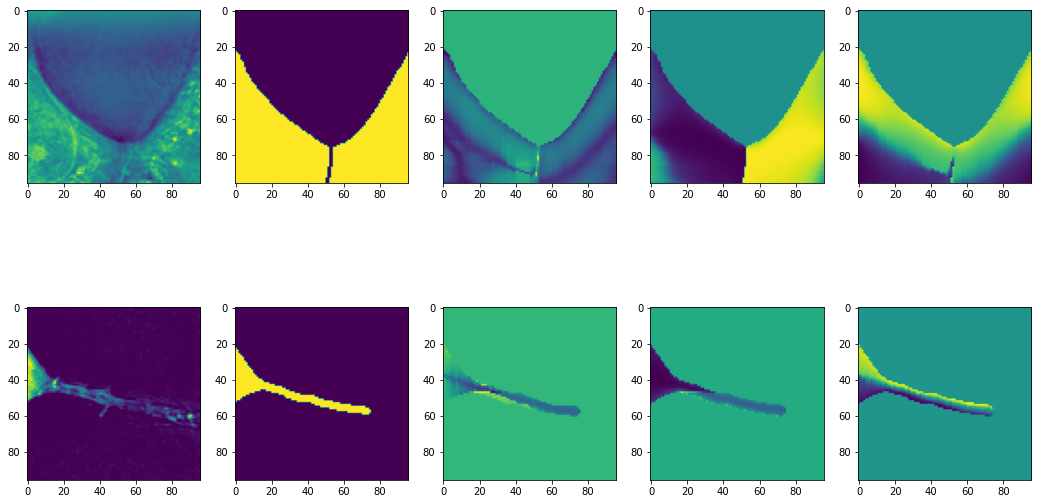

In [13]:
fig, axes = plt.subplots(n_row, 5,sharex=False, sharey=False, figsize=(18,10))
n=0
# for i in valid_loader:
for i in train_loader:
    img2plot=i['image']
    label2plot=i['label']
    print(img2plot.shape, label2plot.shape)

    top= torch.max(img2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()

    # mask0= torch.max(label2plot[0,0,0,:,:,:],dim=-1)[0].detach().cpu()
    # mask1= torch.max(label2plot[0,0,1,:,:,:],dim=-1)[0].detach().cpu()
    # mask2= torch.max(label2plot[0,0,2,:,:,:],dim=-1)[0].detach().cpu()
    # mask3= torch.max(label2plot[0,0,2,:,:,:],dim=-1)[0].detach().cpu()
    zzz = 36
    # mask0= label2plot[0,0,0,:,:,zzz].detach().cpu()
    # mask1= label2plot[0,0,1,:,:,zzz].detach().cpu()
    # mask2= label2plot[0,0,2,:,:,zzz].detach().cpu()
    # mask3= label2plot[0,0,3,:,:,zzz].detach().cpu()
    # mask0= label2plot[0,0,:,:,zzz].detach().cpu()
    mask0= label2plot[0,0,:,:,zzz].detach().cpu()
    mask1= label2plot[0,1,:,:,zzz].detach().cpu()
    mask2= label2plot[0,2,:,:,zzz].detach().cpu()
    mask3= label2plot[0,3,:,:,zzz].detach().cpu()
    # mask1= label2plot[0,0,1,zzz,:,:].detach().cpu()
    # mask2= label2plot[0,0,2,:,zzz,:].detach().cpu()
    # mask3= label2plot[0,0,3,:,:,zzz].detach().cpu()
    # side_label= torch.max(label2plot[0,0,:,:,:],dim=-2)[0].detach().cpu()
    print(mask0.max(),mask0.min())
    print('mask2',mask2.max(),mask2.min())
    axes[n,0].imshow(img2plot[0,0,:,:,zzz])

    
    axes[n,1].imshow(mask0)
    axes[n,2].imshow(mask1)
    axes[n,3].imshow(mask2)
    axes[n,4].imshow(mask3)
    n +=1
    if n>=n_row:
        break

In [54]:
print(mask0.max(),mask0.min())
np.unique(mask0,return_counts=True)

tensor(94.) tensor(0.)


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94.], dtype=float32),
 array([45913, 18588, 13280,  9406,  8833,  6628,  6732,  5831,  5532,
         4864,  4968,  5215,  4936,  5304,  5580,  3751,  3813,  3812,
         2576,  2234,  2496,  2413,  1798,  2046,  2048,  1806,  1642,
         1685,  1715,  1805,  1910,  1952,  1663,  1452,  1241,  1324,
         1282,  1612,  1675,  1532,  1034,  1102,  1107,  1220,  1491,
         1604,  1539,  1618,  1341,  1431,  1348,  1693,  1296,  1029,
          917,  10

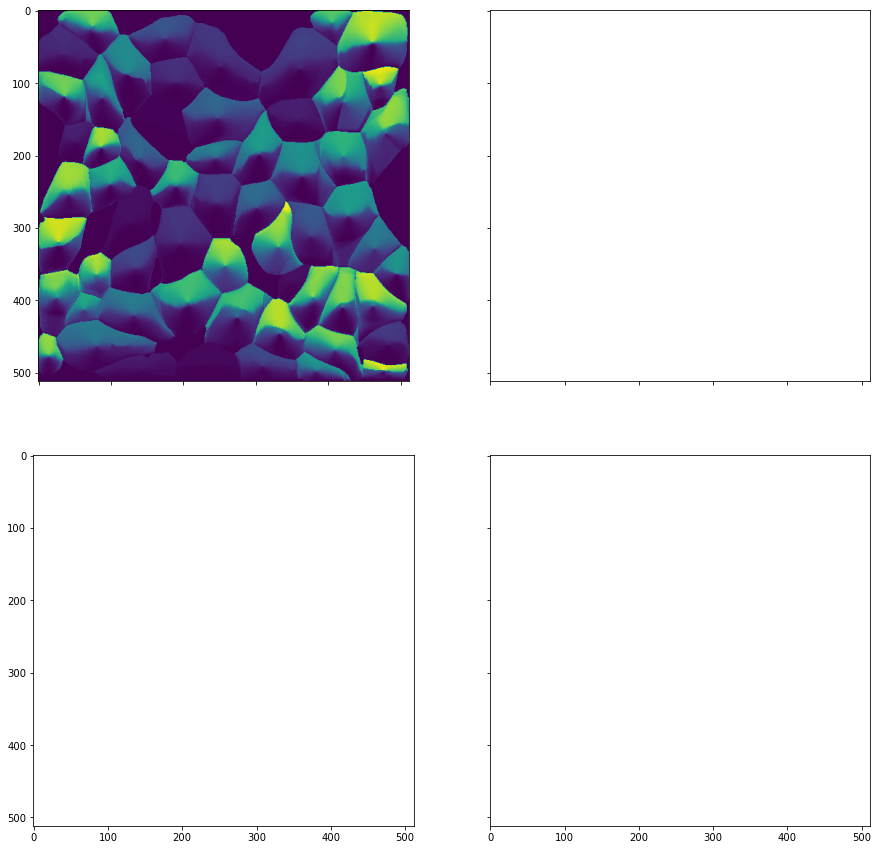

In [53]:

fig, axes = plt.subplots(2, 2,sharex=True, sharey=True, figsize=(15,15))
zzz =36
axes[0][0].imshow(mask0)
# axes[0][0].set_title("image channel 0")
# axes[0][1].imshow(image[zzz,1,:,:])
# axes[0][1].set_title("image channel 1")


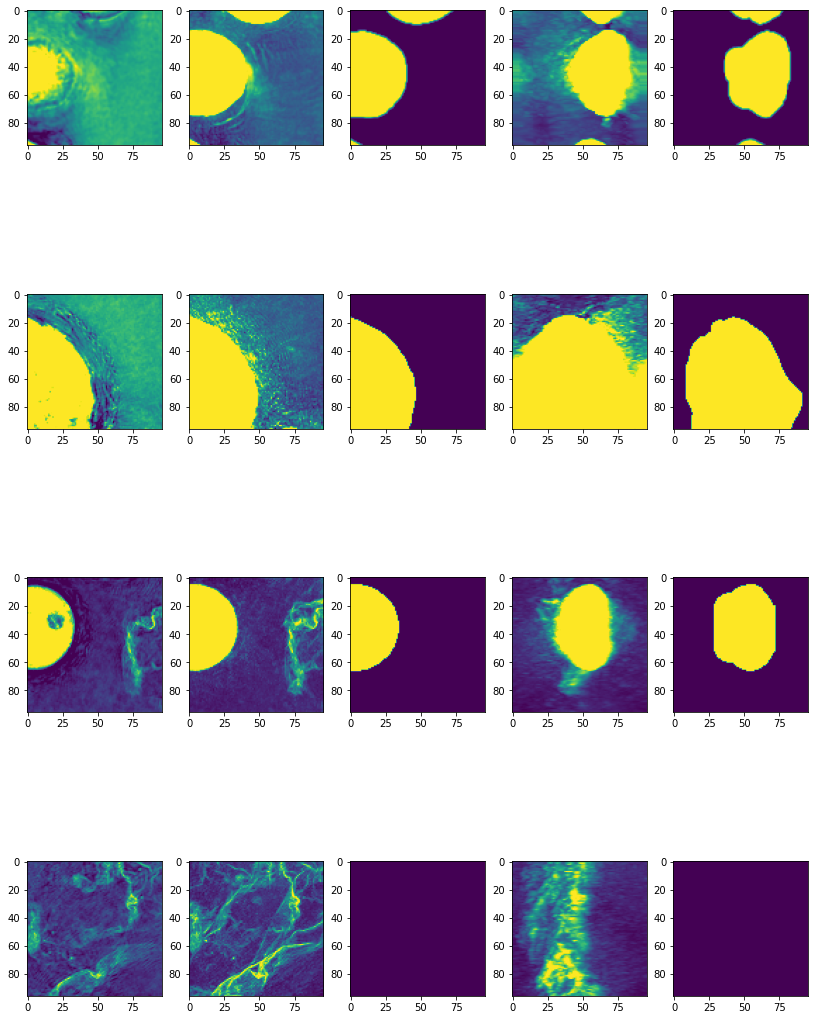

In [22]:
n_row = 4
fig, axes = plt.subplots(n_row, 5,sharex=False, sharey=False, figsize=(14,20))
n=0
for i in train_loader:

    img2plot=i['image']
    label2plot=i['label']
    # print(img2plot.shape)
    # fig,axes = plt.subplots(1,5)
    top= torch.max(img2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    top_label= torch.max(label2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    side= torch.max(img2plot[0,0,:,:,:],dim=-2)[0].detach().cpu()
    side_label= torch.max(label2plot[0,0,:,:,:],dim=-2)[0].detach().cpu()
    # print(test,test.shape)
    axes[n,0].imshow(img2plot[0,0,:,:,48])

    
    axes[n,1].imshow(top)
    axes[n,2].imshow(top_label)
    axes[n,3].imshow(side)
    axes[n,4].imshow(side_label)
    n +=1
    if n>=n_row:
        break

# test loading multiclass images

In [2]:
from monai.transforms import Transform,MapTransform
from monai.utils.enums import TransformBackends
from monai.config.type_definitions import NdarrayOrTensor
from monai.config import DtypeLike, KeysCollection
from typing import Any, Callable, Dict, Hashable, List, Mapping, Optional, Sequence, Tuple, Union, cast


# class ConvertToMultiChannelNanolive(Transform):
#     """
#     Convert labels to multi channels based on brats18 classes:
#     label 1 is the necrotic and non-enhancing tumor core
#     label 2 is the peritumoral edema
#     label 4 is the GD-enhancing tumor
#     The possible classes are TC (Tumor core), WT (Whole tumor)
#     and ET (Enhancing tumor).
#     """

#     backend = [TransformBackends.TORCH, TransformBackends.NUMPY]

#     def __call__(self, img: NdarrayOrTensor) -> NdarrayOrTensor:
#         # if img has channel dim, squeeze it
#         if img.ndim == 4 and img.shape[0] == 1:
#             img = img.squeeze(0)

#         result = [(img == 1) | (img == 4), (img == 1) | (img == 4) | (img == 2), img == 4]
#         # result = [(img == 1) , (img == 2)]
#         # merge labels 1 
#         return torch.stack(result, dim=0) if isinstance(img, torch.Tensor) else np.stack(result, axis=0)


# class ConvertToMultiChannelNanolived(MapTransform):

#     backend = ConvertToMultiChannelNanolive.backend

#     def __init__(self, keys: KeysCollection, allow_missing_keys: bool = False):
#         super().__init__(keys, allow_missing_keys)
#         self.converter = ConvertToMultiChannelNanolive()

#     def __call__(self, data: Mapping[Hashable, NdarrayOrTensor]) -> Dict[Hashable, NdarrayOrTensor]:
#         d = dict(data)
#         for key in self.key_iterator(d):
#             d[key] = self.converter(d[key])
#         return d
# a = monai.transforms.ConvertToMultiChannelBasedOnBratsClassesd
# import monai.transforms.ConvertToMultiChannelBasedOnBratsClassesd
# print(monai.transforms.ConvertToMultiChannelBasedOnBratsClassesd.__file__)
import inspect
# inspect.getmodule(monai.transforms.ConvertToMultiChannelBasedOnBratsClassesd.__class__)

# import sys,os

# os.path.abspath(sys.modules[monai.transforms.ConvertToMultiChannelBasedOnBratsClassesd.__module__].__file__)

5 2
torch.Size([1, 1, 512, 512, 96]) torch.Size([1, 2, 512, 512, 96]) tensor(True) tensor(False)
torch.Size([1, 1, 512, 512, 96]) torch.Size([1, 2, 512, 512, 96]) tensor(True) tensor(False)


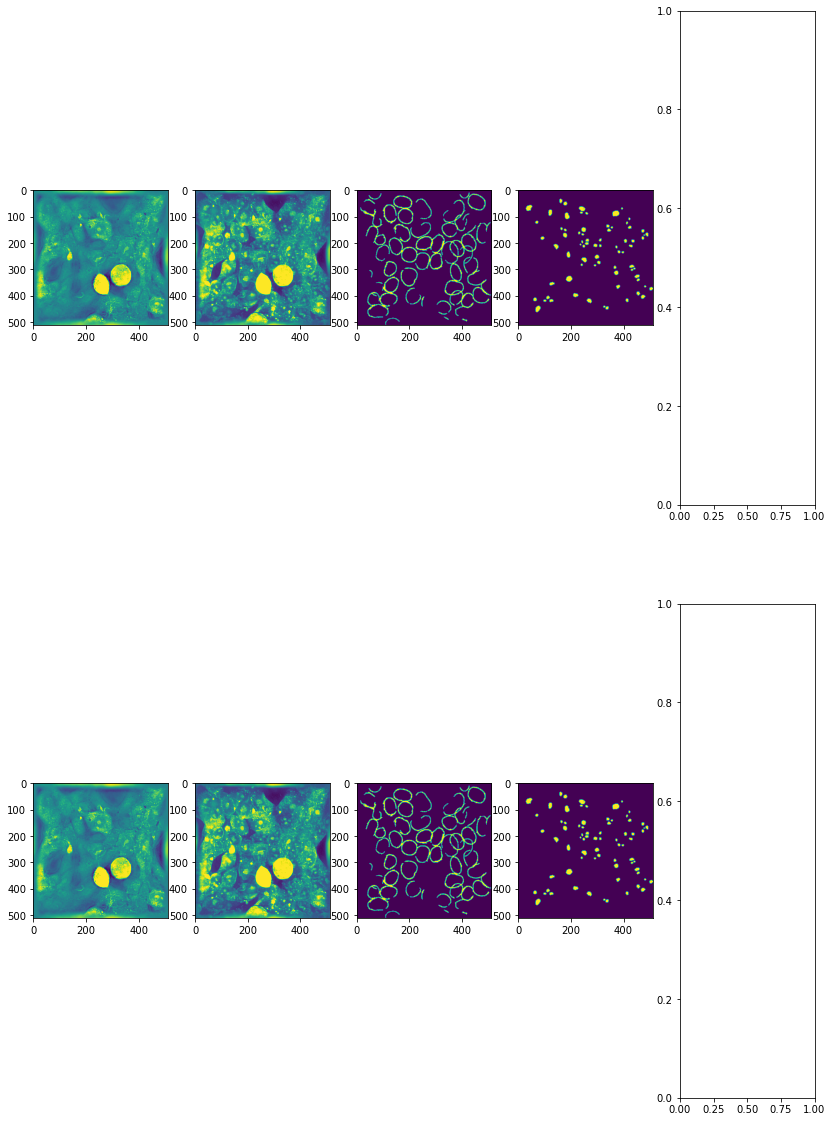

In [2]:

import glob
from monai import data, transforms
import matplotlib.pyplot as plt
import torch
from monai.transforms import MapTransform
import os
# converttomultichannel defined here:
# /home/xzhang/anaconda3/envs/monai/lib/python3.9/site-packages/monai/transforms

data_dir = '/data/programs/monai_research_contributions/SwinUNETR/Nanolive_dataset_mem_2c'

N = len(os.listdir(os.path.join(data_dir,'image')))
# print(N)
split = int(0.8*N) # default 80% for training 
img_full_paths = sorted(glob.glob(os.path.join(data_dir,'image/*')))
label_full_paths = sorted(glob.glob(os.path.join(data_dir,'label/*')))
valid_img_full_paths = img_full_paths[::5]
valid_label_full_paths = label_full_paths[::5]
train_img_full_paths = [f for f in img_full_paths if f not in valid_img_full_paths]
train_label_full_paths = [f for f in label_full_paths if f not in valid_label_full_paths]

train_datalist = [{'image':image,'label':label} for image,label in zip(train_img_full_paths,train_label_full_paths)]    
val_datalist = [{'image':image,'label':label} for image,label in zip(valid_img_full_paths,valid_label_full_paths)]  
# [{'image':i} for i in valid_img_full_paths] +[{'label':i} for i in valid_label_full_paths]
# with open("sample.json", "w") as outfile:
#     json.dump(train_datalist, outfile)
print(len(train_datalist),len(val_datalist))



train_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image", "label"]),
        # transforms.AsDiscreted(keys=["label"],threshold=1),
        transforms.AsDiscreted(keys=["label"],to_onehot=2),
        # transforms.AddChanneld(keys=["image", "label"]),
        transforms.AddChanneld(keys=["image"]),
        transforms.Resized(keys=["image", "label"],spatial_size=(512,512,96)),
        transforms.RandZoomd(keys=["image", "label"],prob=0.5,min_zoom=0.85,max_zoom=1.15),
        # transforms.Spacingd(
        #     keys=["image", "label"], pixdim=(args.space_x, args.space_y, args.space_z), mode=("bilinear", "nearest")
        # ),
        transforms.ScaleIntensityRanged(
            keys=["image"], a_min=21000, a_max=31000, b_min=0, b_max=1, clip=True
        ),
        transforms.RandSpatialCropSamplesd(
            keys=["image","label"],
            roi_size=[96,96,96],
            num_samples=2,
            random_center=True,
            random_size=False,
        ),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=0),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=1),
        transforms.RandFlipd(keys=["image", "label"], prob=0.1, spatial_axis=2),
        transforms.RandRotate90d(keys=["image", "label"], prob=0.1, max_k=3),
        transforms.RandScaleIntensityd(keys="image", factors=0.1, prob=0.1),
        transforms.RandShiftIntensityd(keys="image", offsets=0.1, prob=0.1),
        transforms.ToTensord(keys=["image", "label"]),
    ]
)
valid_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image", "label"]),
        # transforms.EnsureChannelFirstd(keys=["image","label"]),
        # transforms.AsDiscreted(keys=["label"],threshold=2),
        # ConvertToMultiChannel(keys="label"),
        transforms.AddChanneld(keys=["image"]),
        transforms.ConvertToMultiChannelNanolived(keys="label"),
        # transforms.ConvertToMultiChannelBasedOnBratsClassesd(keys="label"),
        # ConvertToMultiChannelNanolived(keys="label"),
        # transforms.AsDiscreted(keys=["label"],to_onehot=1),
        # transforms.AddChanneld(keys=["image", "label"]),
        # transforms.Resized(keys=["image", "label"],spatial_size=(512,512,96)),
        transforms.ScaleIntensityRanged(
            # keys=["image"], a_min=18000, a_max=26000, b_min=0, b_max=1, clip=True
            keys=["image"], a_min=21000, a_max=31000, b_min=0, b_max=1, clip=True
        ),
        transforms.ToTensord(keys=["image", "label"]),
    ]
)


# train_ds = data.Dataset(data=train_datalist, transform=train_transform)
# train_loader = data.DataLoader(
#         train_ds, batch_size=1, num_workers=24, sampler=None, drop_last=True
#     )
valid_ds = data.Dataset(data=val_datalist, transform=valid_transform)
valid_loader = data.DataLoader(
        valid_ds, batch_size=1, num_workers=24, sampler=None, drop_last=True
    )
n_row = 2
fig, axes = plt.subplots(n_row, 5,sharex=False, sharey=False, figsize=(14,20))
n=0
for i in valid_loader:

    img2plot=i['image']
    label2plot=i['label']
    print(img2plot.shape, label2plot.shape,label2plot.max(),label2plot.min())
    # print(img2plot.shape)
    # fig,axes = plt.subplots(1,5)
    top= torch.max(img2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    top_label= torch.max(label2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    side= torch.max(img2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    label1= torch.max(label2plot[0,0,:,:,:],dim=-1)[0].detach().cpu()
    label2= torch.max(label2plot[0,1,:,:,:],dim=-1)[0].detach().cpu()
    # label3= torch.max(label2plot[0,2,:,:,:],dim=-1)[0].detach().cpu()
    # print(test,test.shape)
    axes[n,0].imshow(img2plot[0,0,:,:,48])

    
    axes[n,1].imshow(top)
    axes[n,2].imshow(label1)
    axes[n,3].imshow(label2)
    # axes[n,4].imshow(label3)
    n +=1
    if n>=n_row:
        break

In [3]:
from monai.inferers import sliding_window_inference
from monai.networks.nets import SwinUNETR
from functools import partial
# from monai.transforms import RemoveSmallObjects,FillHoles
# from monai.transforms import FillHoles
from monai.transforms import Activations, AsDiscrete, Compose,FillHoles
model_path = '/data/programs/monai_research_contributions/SwinUNETR/allen/runs/Nanolive_finetune3/foldNone/model_final.pt'
model = SwinUNETR(
    img_size=(96,96,96),
    in_channels=1,
    out_channels=1,
    feature_size=48,
    use_checkpoint=False,
).cuda(0)
model_dict = torch.load(model_path)["state_dict"]
model.load_state_dict(model_dict)


model_inferer = partial(
    sliding_window_inference,
    roi_size=(96,96,96),
    # roi_size=(128,128,96),

    sw_batch_size=2,
    predictor=model,
    overlap=0.5,
)
post_sigmoid = Activations(sigmoid=True)
# post_pred = AsDiscrete(argmax=False, logit_thresh=1.01)
post_pred = AsDiscrete(argmax=False, threshold=0.6)



# print(val_output_convert.shape)


In [4]:
post_trans = Compose([
    Activations(sigmoid=True),
    AsDiscrete(argmax=False, threshold=0.5),
    # RemoveSmallObjects(min_size = 100),
    FillHoles(applied_labels=None, connectivity=2)

])

with torch.no_grad():
        for idx, batch_data in enumerate(valid_loader):
            data_raw, target = batch_data["image"], batch_data["label"]
            data_raw, target = data_raw.cuda(0), target.cuda(0)
            # with autocast(enabled=True):
            logits = model_inferer(data_raw)
            # val_labels_list = decollate_batch(target)
            # val_outputs_list = decollate_batch(logits)
            print(logits.max(),logits.min())
            val_labels_list = target
            val_outputs_list = logits
            # val_output_convert = [post_pred(post_sigmoid(val_pred_tensor)) for val_pred_tensor in val_outputs_list]
            a = post_sigmoid(val_outputs_list)
            print('after sigmoid',a.max(),a.min(),a.median())
            val_output_convert1 = post_pred(post_sigmoid(val_outputs_list))
            val_output_convert2 = post_trans(logits)
            print(val_output_convert1.max(),val_output_convert1.min(),val_output_convert1.median())

tensor(268.0057, device='cuda:0') tensor(-16.6058, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(6.1402e-08, device='cuda:0') tensor(0.0005, device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0') tensor(0., device='cuda:0')
tensor(268.0057, device='cuda:0') tensor(-16.6058, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(6.1402e-08, device='cuda:0') tensor(0.0005, device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0') tensor(0., device='cuda:0')


torch.Size([1, 1, 512, 512, 96])
(512, 512, 30) (512, 512)


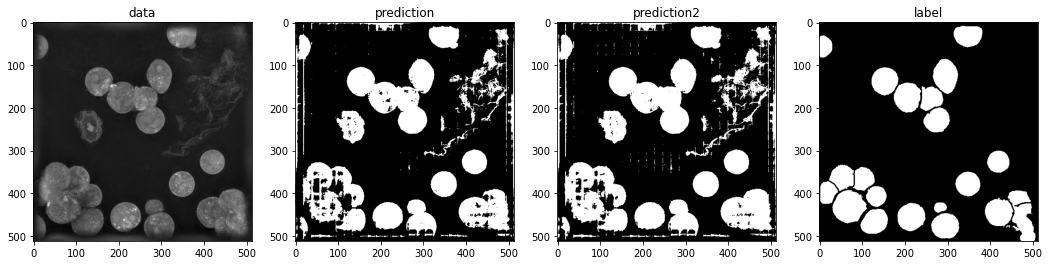

In [12]:
print(val_output_convert1.shape)
import numpy as np
plt.figure("image", (18, 6))
plt.subplot(1, 4, 1)
plt.title("data")
# image1 = np.max(data[0].detach().cpu()[0,:, :, 30:60],axis = -1)
image0 = data_raw[0].detach().cpu().numpy()[0,:, :, 30:60]
image1 = np.max(image0, axis=-1)

print(image0.shape, image1.shape)
plt.imshow(image1, cmap="gray")
plt.subplot(1, 4, 2)
plt.title("prediction")
pred = val_output_convert1.detach().cpu().numpy()[0,0,:, :, 35:55]
pred = np.max(pred, axis=-1)
plt.imshow(pred, cmap="gray")

plt.subplot(1, 4, 3)
plt.title("prediction2")
pred2 = val_output_convert2.detach().cpu().numpy()[0,0,:, :, 30:60]
pred2 = np.max(pred2, axis=-1)
plt.imshow(pred2, cmap="gray")

plt.subplot(1, 4, 4)
plt.title("label")
plt.imshow(target[0].detach().cpu()[0,:, :, 48], cmap="gray")

plt.show()



# test inference

In [27]:
root_dir = '/data/download_data/quilt-data-access-tutorials-main/all_fov/'
df = pd.read_csv(root_dir+'meta_info.csv')

# input_dir=df['fov_path'].unique()[100:220].tolist()
# target_dir=df['fov_seg_path'].unique()[100:220].tolist()
# train_img_paths =input_dir[:100]
# train_label_paths = target_dir[:100]
# valid_img_paths =input_dir[100:]
# valid_label_paths = target_dir[100:]

input_dir=df['fov_path'].unique()[300:320].tolist()
# target_dir=df['fov_seg_path'].unique()[:20].tolist()
train_img_paths =input_dir[:20]



train_img_full_paths =[os.path.join(root_dir,'fov_path_channel/'+file.split('/')[-1]) for file in train_img_paths]





test_datalist = [{'image':a} for a in train_img_full_paths] 
test_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.AddChanneld(keys=["image"]),
        transforms.Resized(keys=["image"],spatial_size=(512,512,96)),
        # transforms.ScaleIntensityRanged(
        #     keys=["image"], a_min=18000, a_max=26000, b_min=0, b_max=1, clip=True
        # ),
        transforms.ToTensord(keys=["image"]),
    ]
)

test_ds = data.Dataset(data=test_datalist, transform=test_transform)
test_loader = data.DataLoader(
        test_ds, batch_size=1, num_workers=24, sampler=None, drop_last=True
    )

Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.


In [28]:
from monai.inferers import sliding_window_inference
from monai.networks.nets import SwinUNETR
from functools import partial
# from monai.transforms import RemoveSmallObjects,FillHoles
# from monai.transforms import FillHoles
from monai.transforms import Activations, AsDiscrete, Compose,FillHoles
model_path = '/data/programs/monai_research_contributions/SwinUNETR/allen/runs/Nanolive_finetune3/foldNone/model_final.pt'
model = SwinUNETR(
    img_size=(96,96,96),
    in_channels=1,
    out_channels=1,
    feature_size=48,
    use_checkpoint=False,
).cuda(0)
model_dict = torch.load(model_path)["state_dict"]
model.load_state_dict(model_dict)


model_inferer = partial(
    sliding_window_inference,
    roi_size=(96,96,96),
    # roi_size=(128,128,96),

    sw_batch_size=2,
    predictor=model,
    overlap=0.5,
)
post_sigmoid = Activations(sigmoid=True)
# post_pred = AsDiscrete(argmax=False, logit_thresh=1.01)
post_pred = AsDiscrete(argmax=False, threshold=0.6)

In [31]:
post_trans = Compose([
    Activations(sigmoid=True),
    AsDiscrete(argmax=False, threshold=0.5),
    # RemoveSmallObjects(min_size = 100),
    FillHoles(applied_labels=None, connectivity=2)

])

with torch.no_grad():
        for idx, batch_data in enumerate(test_loader):
            data_test = batch_data["image"]
            data_test = data_test.cuda(0)
            # with autocast(enabled=True):
            logits = model_inferer(data_test)
            # val_labels_list = decollate_batch(target)
            # val_outputs_list = decollate_batch(logits)
            print(logits.max(),logits.min())

            test_outputs_list = logits
            # val_output_convert = [post_pred(post_sigmoid(val_pred_tensor)) for val_pred_tensor in val_outputs_list]
            a = post_sigmoid(test_outputs_list)
            print('after sigmoid',a.max(),a.min(),a.median())
            test_output_convert1 = post_pred(post_sigmoid(test_outputs_list))
            test_output_convert2 = post_trans(logits)
            # print(val_output_convert1.max(),val_output_convert1.min(),val_output_convert1.median())

tensor(107.0293, device='cuda:0') tensor(-12.1564, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(5.2544e-06, device='cuda:0') tensor(0.0052, device='cuda:0')
tensor(85.8323, device='cuda:0') tensor(-15.6975, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(1.5228e-07, device='cuda:0') tensor(0.0061, device='cuda:0')
tensor(49.4350, device='cuda:0') tensor(-14.2095, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(6.7435e-07, device='cuda:0') tensor(0.0054, device='cuda:0')
tensor(71.0185, device='cuda:0') tensor(-12.2007, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(5.0267e-06, device='cuda:0') tensor(0.0056, device='cuda:0')
tensor(49.4618, device='cuda:0') tensor(-12.0011, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tensor(6.1371e-06, device='cuda:0') tensor(0.0057, device='cuda:0')
tensor(43.2879, device='cuda:0') tensor(-11.9350, device='cuda:0')
after sigmoid tensor(1., device='cuda:0') tenso

(512, 512, 30) (512, 512)


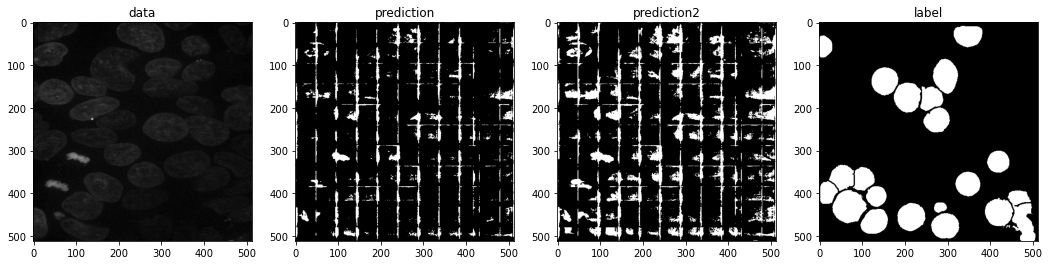

In [32]:
import numpy as np
plt.figure("image", (18, 6))
plt.subplot(1, 4, 1)
plt.title("data")
# image1 = np.max(data[0].detach().cpu()[0,:, :, 30:60],axis = -1)
image0 = data_test[0].detach().cpu().numpy()[0,:, :, 30:60]
image1 = np.max(image0, axis=-1)

print(image0.shape, image1.shape)
plt.imshow(image1, cmap="gray")
plt.subplot(1, 4, 2)
plt.title("prediction")
pred = test_output_convert1.detach().cpu().numpy()[0,0,:, :, 30:65]
pred = np.max(pred, axis=-1)
plt.imshow(pred, cmap="gray")

plt.subplot(1, 4, 3)
plt.title("prediction2")
pred2 = test_output_convert2.detach().cpu().numpy()[0,0,:, :, 30:65]
pred2 = np.max(pred2, axis=-1)
plt.imshow(pred2, cmap="gray")

plt.subplot(1, 4, 4)
plt.title("label")
# plt.imshow(target[0].detach().cpu()[0,:, :, 48], cmap="gray")

plt.show()

[0, 2, 2, 2, 4, 4, 6, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11]


11

In [48]:
import tensorboard as tb
import glob
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

scratch_list =[]
ssl300_list =[]
ssl1000_list =[]

sc_best = []
ssl300_best = []
ssl1000_best = []
for i in range(5):
    scratch_folder = './runs/allen10_scratch_5fold_v2/fold'+ str(i)+'/event*'
    
    scratch_folder = glob.glob(scratch_folder)
    # print(scratch_folder)
    # SSL_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    # SSL_folder = glob.glob(SSL_folder)
    # SSL_event_acc=EventAccumulator(SSL_folder[0])
    scratch_event_acc=EventAccumulator(scratch_folder[0])
    scratch_event_acc.Reload()
    w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    # print(scratch_vals)
    # break
    # w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    sc_best.append(np.array(scratch_vals).max())

    scratch_list.append(scratch_vals)


for i in range(5):
    # SSL_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    SSL1000_folder = './runs/test_allen10_pretrained1000_finetune_5fold/fold'+ str(i)+'/event*'
    SSL1000_folder = glob.glob(SSL1000_folder)
    print(SSL1000_folder)
    SSL1000_event_acc=EventAccumulator(SSL1000_folder[0])
    SSL1000_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    # w_times, step_nums, SSL_vals = zip(*SSL_event_acc.Scalars('Dice_Val_TC'))

    w_times, step_nums_sc, SSL1000_vals = zip(*SSL1000_event_acc.Scalars('Dice_Val_Class'))
    ssl1000_best.append(np.array(SSL1000_vals).max())
    ssl1000_list.append(SSL1000_vals)



for i in range(5):
    SSL300_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    # SSL300_folder = './runs/test_allen10_pretrained300_finetune_5fold/fold'+ str(i)+'/event*'
    SSL300_folder = glob.glob(SSL300_folder)
    print(SSL300_folder)
    SSL300_event_acc=EventAccumulator(SSL300_folder[0])
    SSL300_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    w_times, step_nums, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_TC'))

    # w_times, step_nums_sc, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_Class'))
    ssl300_best.append(np.array(SSL300_vals).max())
    ssl300_list.append(SSL300_vals)
print(max(SSL1000_vals),max(SSL300_vals),max(scratch_vals))



['./runs/test_allen10_pretrained1000_finetune_5fold/fold0/events.out.tfevents.1674171750.msb03']
['./runs/test_allen10_pretrained1000_finetune_5fold/fold1/events.out.tfevents.1674174024.msb03']
['./runs/test_allen10_pretrained1000_finetune_5fold/fold2/events.out.tfevents.1674176271.msb03']
['./runs/test_allen10_pretrained1000_finetune_5fold/fold3/events.out.tfevents.1674178522.msb03']
['./runs/test_allen10_pretrained1000_finetune_5fold/fold4/events.out.tfevents.1674180783.msb03']
['./runs/allen10_finetune_5fold/fold0/events.out.tfevents.1673484147.msb03']
['./runs/allen10_finetune_5fold/fold1/events.out.tfevents.1673485557.msb03']
['./runs/allen10_finetune_5fold/fold2/events.out.tfevents.1673486961.msb03']
['./runs/allen10_finetune_5fold/fold3/events.out.tfevents.1673488355.msb03']
['./runs/allen10_finetune_5fold/fold4/events.out.tfevents.1673489752.msb03']
0.9065331220626831 0.8932385444641113 0.7927970886230469


In [41]:
import tensorboard as tb
import glob
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

scratch_list =[]
ssl300_list =[]
ssl1000_list =[]

sc_best = []
ssl300_best = []
ssl1000_best = []
for i in range(5):
    scratch_folder = './runs/allen10_scratch_5fold_v3/fold'+ str(i)+'/event*'
    
    scratch_folder = glob.glob(scratch_folder)
    print(scratch_folder)
    # SSL_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    # SSL_folder = glob.glob(SSL_folder)
    # SSL_event_acc=EventAccumulator(SSL_folder[0])
    scratch_event_acc=EventAccumulator(scratch_folder[0])
    # SSL_event_acc.Reload()
    scratch_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    # print(scratch_vals)
    # break
    # w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    sc_best.append(np.array(scratch_vals).max())

    scratch_list.append(scratch_vals)


for i in range(5):
    # SSL_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    SSL1000_folder = './runs/allen10_pretrained1000_finetune_5fold_v2/fold'+ str(i)+'/event*'
    SSL1000_folder = glob.glob(SSL1000_folder)
    print(SSL1000_folder)
    SSL1000_event_acc=EventAccumulator(SSL1000_folder[0])
    SSL1000_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    # w_times, step_nums, SSL_vals = zip(*SSL_event_acc.Scalars('Dice_Val_TC'))

    w_times, step_nums_sc, SSL1000_vals = zip(*SSL1000_event_acc.Scalars('Dice_Val_Class'))
    ssl1000_best.append(np.array(SSL1000_vals).max())
    ssl1000_list.append(SSL1000_vals)



for i in range(5):
    # SSL300_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    SSL300_folder = './runs/allen10_pretrained300_5fold_v3/fold'+ str(i)+'/event*'
    SSL300_folder = glob.glob(SSL300_folder)
    print(SSL300_folder)
    SSL300_event_acc=EventAccumulator(SSL300_folder[0])
    SSL300_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    w_times, step_nums, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_Class'))

    # w_times, step_nums_sc, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_Class'))
    ssl300_best.append(np.array(SSL300_vals).max())
    ssl300_list.append(SSL300_vals)
print(max(SSL1000_vals),max(SSL300_vals),max(scratch_vals))

['./runs/allen10_pretrained1000_finetune_5fold_v2/fold0/events.out.tfevents.1674436846.msb03']
['./runs/allen10_pretrained1000_finetune_5fold_v2/fold1/events.out.tfevents.1674438910.msb03']
['./runs/allen10_pretrained1000_finetune_5fold_v2/fold2/events.out.tfevents.1674440965.msb03']
['./runs/allen10_pretrained1000_finetune_5fold_v2/fold3/events.out.tfevents.1674443013.msb03']
['./runs/allen10_pretrained1000_finetune_5fold_v2/fold4/events.out.tfevents.1674445078.msb03']
['./runs/allen10_pretrained300_5fold_v3/fold0/events.out.tfevents.1674426595.msb03']
['./runs/allen10_pretrained300_5fold_v3/fold1/events.out.tfevents.1674428649.msb03']
['./runs/allen10_pretrained300_5fold_v3/fold2/events.out.tfevents.1674430711.msb03']
['./runs/allen10_pretrained300_5fold_v3/fold3/events.out.tfevents.1674432771.msb03']
['./runs/allen10_pretrained300_5fold_v3/fold4/events.out.tfevents.1674434818.msb03']
0.8288975358009338 0.8698103427886963 0.8778170943260193


In [49]:
# print(np.mean(ssl300_best),np.mean(sc_best))
from scipy.stats import ttest_ind

res = ttest_ind(ssl1000_best, sc_best)

print(res)
# print(scratch_list[0])

Ttest_indResult(statistic=2.5169753118175353, pvalue=0.035977875574830454)


5 60
(4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299)


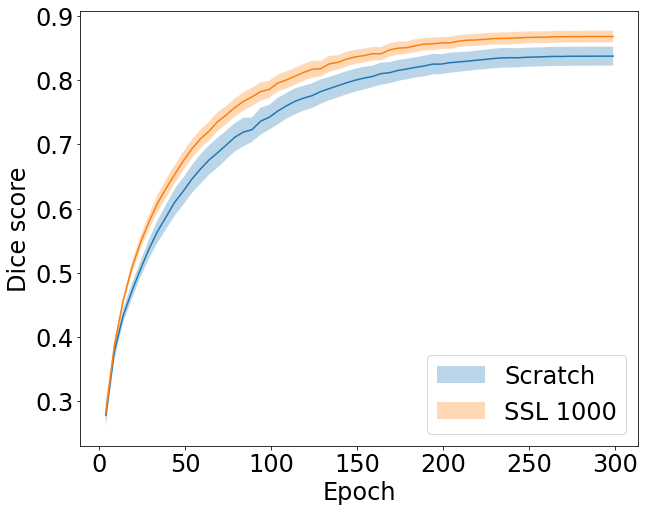

In [46]:
import matplotlib.pyplot as plt
m,n =np.array(scratch_list).shape
print(m,n)


print(step_nums_sc)
sc_mean = np.mean(scratch_list,axis=0)
ssl300_mean = np.mean(ssl300_list,axis = 0)
ssl1000_mean = np.mean(ssl1000_list,axis = 0)

sc_se = np.std(scratch_list,axis=0)/np.sqrt(m)
ssl300_se = np.std(ssl300_list,axis=0)/np.sqrt(m)
ssl1000_se = np.std(ssl1000_list,axis=0)/np.sqrt(m)


fig, ax = plt.subplots(figsize=(10,8))

ax.plot(step_nums_sc,sc_mean)
# ax.plot(step_nums_sc,ssl300_mean)
ax.plot(step_nums_sc,ssl1000_mean)
ax.fill_between(step_nums_sc,sc_mean-sc_se,sc_mean+sc_se,alpha=0.3,label='Scratch')
# ax.fill_between(step_nums_sc,ssl300_mean-ssl300_se,ssl300_mean+ssl300_se,alpha=0.3,label='SSL 300')
ax.fill_between(step_nums_sc,ssl1000_mean-ssl1000_se,ssl1000_mean+ssl1000_se,alpha=0.3,label='SSL 1000')

ax.set_xlabel('Epoch',fontsize =24)
ax.set_ylabel('Dice score',fontsize =24)
ax.tick_params(labelsize=24)
plt.legend(loc='lower right',fontsize=24)

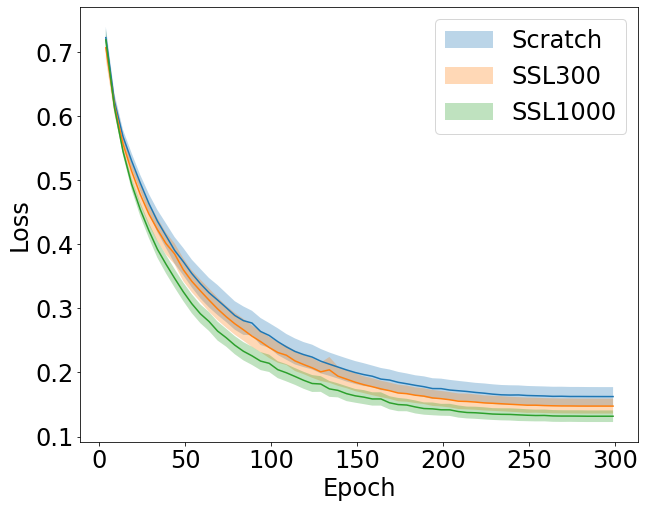

In [45]:
sc_error = 1-np.array(scratch_list)
ssl300_error = 1-np.array(ssl300_list)
ssl1000_error = 1-np.array(ssl1000_list)

sc_error_mean = np.mean(sc_error,axis=0)
ssl300_error_mean = np.mean(ssl300_error,axis=0)
ssl1000_error_mean = np.mean(ssl1000_error,axis=0)

sc_error_se = np.std(sc_error,axis=0)/np.sqrt(m)
ssl300_error_se = np.std(ssl300_error,axis=0)/np.sqrt(m)
ssl1000_error_se = np.std(ssl1000_error,axis=0)/np.sqrt(m)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(step_nums_sc,sc_error_mean)
ax.plot(step_nums_sc,ssl300_error_mean)
ax.plot(step_nums_sc,ssl1000_error_mean)

ax.fill_between(step_nums_sc,sc_error_mean-sc_error_se,sc_error_mean+sc_error_se,alpha=0.3,label='Scratch')
ax.fill_between(step_nums_sc,ssl300_error_mean-ssl300_error_se,ssl300_error_mean+ssl300_error_se,alpha=0.3,label='SSL300')
ax.fill_between(step_nums_sc,ssl1000_error_mean-ssl1000_error_se,ssl1000_error_mean+ssl1000_error_se,alpha=0.3,label='SSL1000')
ax.tick_params(labelsize=24)

ax.set_xlabel('Epoch',fontsize =24)
ax.set_ylabel('Loss',fontsize =24)
plt.legend(loc='upper right',fontsize=24)

In [6]:
import tensorboard as tb
import glob
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

scratch_list =[]
ssl300_list =[]
ssl1000_list =[]

sc_best = []
ssl300_best = []
ssl1000_best = []
for i in range(5):
    scratch_folder = './runs/allen50_scratch_5fold/fold'+ str(i)+'/event*'
    
    scratch_folder = glob.glob(scratch_folder)
    scratch_event_acc=EventAccumulator(scratch_folder[0])
    scratch_event_acc.Reload()
    w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    # print(scratch_vals)
    # break
    # w_times, step_nums_sc, scratch_vals = zip(*scratch_event_acc.Scalars('Dice_Val_Class'))
    sc_best.append(np.array(scratch_vals).max())

    scratch_list.append(scratch_vals)


for i in range(5):
    # SSL_folder = './runs/allen10_finetune_5fold/fold'+ str(i)+'/*'
    SSL1000_folder = './runs/allen50_pretrained1000_finetune_5fold/fold'+ str(i)+'/event*'
    SSL1000_folder = glob.glob(SSL1000_folder)
    print(SSL1000_folder)
    SSL1000_event_acc=EventAccumulator(SSL1000_folder[0])
    SSL1000_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    # w_times, step_nums, SSL_vals = zip(*SSL_event_acc.Scalars('Dice_Val_TC'))

    w_times, step_nums_sc, SSL1000_vals = zip(*SSL1000_event_acc.Scalars('Dice_Val_Class'))
    ssl1000_best.append(np.array(SSL1000_vals).max())
    ssl1000_list.append(SSL1000_vals)



for i in range(5):
    SSL300_folder = './runs/allen50_pretrained300_5fold/fold'+ str(i)+'/event*'
    # SSL300_folder = './runs/test_allen10_pretrained300_finetune_5fold/fold'+ str(i)+'/event*'
    SSL300_folder = glob.glob(SSL300_folder)
    print(SSL300_folder)
    SSL300_event_acc=EventAccumulator(SSL300_folder[0])
    SSL300_event_acc.Reload()
    # print(event_acc.Tags()['scalars'])
    # print(event_acc.Scalars('Dice_Val_TC'))
    w_times, step_nums, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_Class'))

    # w_times, step_nums_sc, SSL300_vals = zip(*SSL300_event_acc.Scalars('Dice_Val_Class'))
    ssl300_best.append(np.array(SSL300_vals).max())
    ssl300_list.append(SSL300_vals)
print(max(SSL1000_vals),max(SSL300_vals),max(scratch_vals))



['./runs/allen50_pretrained1000_finetune_5fold/fold0/events.out.tfevents.1674517394.msb03']
['./runs/allen50_pretrained1000_finetune_5fold/fold1/events.out.tfevents.1674524973.msb03']
['./runs/allen50_pretrained1000_finetune_5fold/fold2/events.out.tfevents.1674532569.msb03']
['./runs/allen50_pretrained1000_finetune_5fold/fold3/events.out.tfevents.1674540179.msb03']
['./runs/allen50_pretrained1000_finetune_5fold/fold4/events.out.tfevents.1674547785.msb03']
['./runs/allen50_pretrained300_5fold/fold0/events.out.tfevents.1674492289.msb03']
['./runs/allen50_pretrained300_5fold/fold1/events.out.tfevents.1674500008.msb03']
['./runs/allen50_pretrained300_5fold/fold2/events.out.tfevents.1674507968.msb03']
['./runs/allen50_pretrained300_5fold/fold3/events.out.tfevents.1674571061.msb03']
['./runs/allen50_pretrained300_5fold/fold4/events.out.tfevents.1674578812.msb03']
0.9449073672294617 0.9469579458236694 0.9460958242416382


5 60
(4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299)


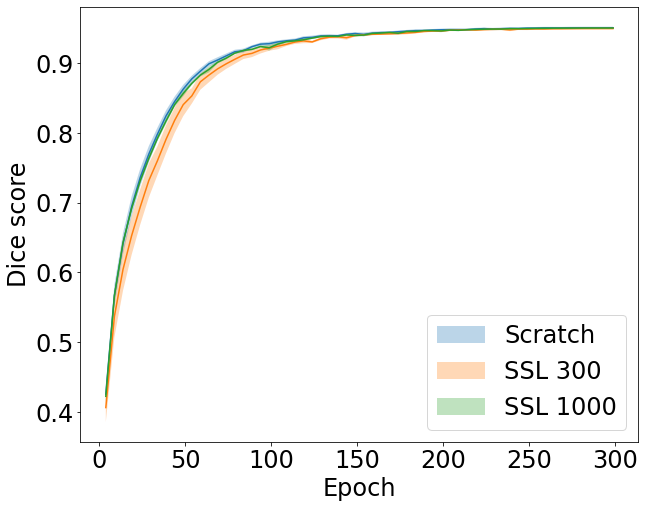

In [8]:
import matplotlib.pyplot as plt
m,n =np.array(scratch_list).shape
print(m,n)


print(step_nums_sc)
sc_mean = np.mean(scratch_list,axis=0)
ssl300_mean = np.mean(ssl300_list,axis = 0)
ssl1000_mean = np.mean(ssl1000_list,axis = 0)

sc_se = np.std(scratch_list,axis=0)/np.sqrt(m)
ssl300_se = np.std(ssl300_list,axis=0)/np.sqrt(m)
ssl1000_se = np.std(ssl1000_list,axis=0)/np.sqrt(m)


fig, ax = plt.subplots(figsize=(10,8))

ax.plot(step_nums_sc,sc_mean)
ax.plot(step_nums_sc,ssl300_mean)
ax.plot(step_nums_sc,ssl1000_mean)
ax.fill_between(step_nums_sc,sc_mean-sc_se,sc_mean+sc_se,alpha=0.3,label='Scratch')
ax.fill_between(step_nums_sc,ssl300_mean-ssl300_se,ssl300_mean+ssl300_se,alpha=0.3,label='SSL 300')
ax.fill_between(step_nums_sc,ssl1000_mean-ssl1000_se,ssl1000_mean+ssl1000_se,alpha=0.3,label='SSL 1000')

ax.set_xlabel('Epoch',fontsize =24)
ax.set_ylabel('Dice score',fontsize =24)
ax.tick_params(labelsize=24)
plt.legend(loc='lower right',fontsize=24)

In [48]:
transform_results = train_transforms(tiff_datalist)
print(len(transform_results[0]))
img2plot=transform_results[0][0]['image']
print(img2plot.shape)
plt.imshow(img2plot[0,:,:,48])


RuntimeError: applying transform <monai.transforms.utility.dictionary.ToTensord object at 0x7f970e470370>

In [29]:
img2plot=transform_results[0]
print(img2plot)


[{'image': array([[[[0.37976184, 0.38809532, 0.41309533, ..., 0.38273817,
          0.39583325, 0.4       ],
         [0.3674604 , 0.3857143 , 0.39603186, ..., 0.35277775,
          0.3761904 , 0.38968244],
         [0.34642857, 0.38452387, 0.3875    , ..., 0.38392857,
          0.375     , 0.36785713],
         ...,
         [0.35833326, 0.389881  , 0.3761904 , ..., 0.40833327,
          0.39940467, 0.39523816],
         [0.3738096 , 0.38452387, 0.3630953 , ..., 0.4119047 ,
          0.39404756, 0.3869047 ],
         [0.40357143, 0.40952387, 0.3869047 , ..., 0.39821428,
          0.4       , 0.40595245]],

        [[0.38333327, 0.37857142, 0.40357143, ..., 0.3970239 ,
          0.3875    , 0.36547613],
         [0.38650796, 0.38333327, 0.38730142, ..., 0.38055572,
          0.36825386, 0.36825386],
         [0.3595239 , 0.3625    , 0.3755953 , ..., 0.38035715,
          0.36726183, 0.3607143 ],
         ...,
         [0.34047613, 0.36904755, 0.3482143 , ..., 0.4154761 ,
          0.41

## Setup average meter, fold reader, checkpoint saver

In [4]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = np.where(self.count > 0, self.sum / self.count, self.sum)


def datafold_read(datalist, basedir, fold=0, key="training"):

    with open(datalist) as f:
        json_data = json.load(f)

    json_data = json_data[key]

    for d in json_data:
        for k, v in d.items():
            if isinstance(d[k], list):
                d[k] = [os.path.join(basedir, iv) for iv in d[k]]
            elif isinstance(d[k], str):
                d[k] = os.path.join(basedir, d[k]) if len(d[k]) > 0 else d[k]

    tr = []
    val = []
    for d in json_data:
        if "fold" in d and d["fold"] == fold:
            val.append(d)
        else:
            tr.append(d)

    return tr, val


def save_checkpoint(model, epoch, filename="model.pt", best_acc=0, dir_add=root_dir):
    state_dict = model.state_dict()
    save_dict = {"epoch": epoch, "best_acc": best_acc, "state_dict": state_dict}
    filename = os.path.join(dir_add, filename)
    torch.save(save_dict, filename)
    print("Saving checkpoint", filename)

## Setup dataloader

In [5]:
def get_loader(batch_size, data_dir, json_list, fold, roi):
    data_dir = data_dir
    datalist_json = json_list
    train_files, validation_files = datafold_read(
        datalist=datalist_json, basedir=data_dir, fold=fold
    )
    train_transform = transforms.Compose(
        [
            transforms.LoadImaged(keys=["image", "label"]),
            transforms.ConvertToMultiChannelBasedOnBratsClassesd(keys="label"),
            transforms.CropForegroundd(
                keys=["image", "label"],
                source_key="image",
                k_divisible=[roi[0], roi[1], roi[2]],
            ),
            transforms.RandSpatialCropd(
                keys=["image", "label"],
                roi_size=[roi[0], roi[1], roi[2]],
                random_size=False,
            ),
            transforms.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=0),
            transforms.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=1),
            transforms.RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=2),
            transforms.NormalizeIntensityd(
                keys="image", nonzero=True, channel_wise=True
            ),
            transforms.RandScaleIntensityd(keys="image", factors=0.1, prob=1.0),
            transforms.RandShiftIntensityd(keys="image", offsets=0.1, prob=1.0),
        ]
    )
    val_transform = transforms.Compose(
        [
            transforms.LoadImaged(keys=["image", "label"]),
            transforms.ConvertToMultiChannelBasedOnBratsClassesd(keys="label"),
            transforms.NormalizeIntensityd(
                keys="image", nonzero=True, channel_wise=True
            ),
        ]
    )

    train_ds = data.Dataset(data=train_files, transform=train_transform)

    train_loader = data.DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=8,
        pin_memory=True,
    )
    val_ds = data.Dataset(data=validation_files, transform=val_transform)
    val_loader = data.DataLoader(
        val_ds,
        batch_size=1,
        shuffle=False,
        num_workers=8,
        pin_memory=True,
    )

    return train_loader, val_loader

## Set dataset root directory and hyper-parameters

The following hyper-parameters are set for the purpose of this tutorial. However, additional changes, as described below, maybe beneficial. 

If GPU memory is not sufficient, reduce sw_batch_size to 2 or batch_size to 1. 

Decrease val_every (validation frequency) to 1 for obtaining more accurate checkpoints.

## Check data shape and visualize

In [16]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# model = SwinUNETR(
#     img_size=roi,
#     in_channels=4,
#     out_channels=3,
#     feature_size=48,
#     drop_rate=0.0,
#     attn_drop_rate=0.0,
#     dropout_path_rate=0.0,
#     use_checkpoint=True,
# ).to(device)

cuda


## Optimizer and loss function

In [9]:
torch.backends.cudnn.benchmark = True
dice_loss = DiceLoss(to_onehot_y=False, sigmoid=True)
post_sigmoid = Activations(sigmoid=True)
post_pred = AsDiscrete(argmax=False, threshold=0.5)
dice_acc = DiceMetric(
    include_background=True, reduction=MetricReduction.MEAN_BATCH, get_not_nans=True
)
model_inferer = partial(
    sliding_window_inference,
    roi_size=[roi[0], roi[1], roi[2]],
    sw_batch_size=sw_batch_size,
    predictor=model,
    overlap=infer_overlap,
)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max_epochs)

## Define Train and Validation Epoch

In [10]:
def train_epoch(model, loader, optimizer, epoch, loss_func):
    model.train()
    start_time = time.time()
    run_loss = AverageMeter()
    for idx, batch_data in enumerate(loader):
        data, target = batch_data["image"].to(device), batch_data["label"].to(device)
        logits = model(data)
        loss = loss_func(logits, target)
        loss.backward()
        optimizer.step()
        run_loss.update(loss.item(), n=batch_size)
        print(
            "Epoch {}/{} {}/{}".format(epoch, max_epochs, idx, len(loader)),
            "loss: {:.4f}".format(run_loss.avg),
            "time {:.2f}s".format(time.time() - start_time),
        )
        start_time = time.time()
    return run_loss.avg


def val_epoch(
    model,
    loader,
    epoch,
    acc_func,
    model_inferer=None,
    post_sigmoid=None,
    post_pred=None,
):
    model.eval()
    start_time = time.time()
    run_acc = AverageMeter()

    with torch.no_grad():
        for idx, batch_data in enumerate(loader):
            data, target = batch_data["image"].to(device), batch_data["label"].to(
                device
            )
            logits = model_inferer(data)
            val_labels_list = decollate_batch(target)
            val_outputs_list = decollate_batch(logits)
            val_output_convert = [
                post_pred(post_sigmoid(val_pred_tensor))
                for val_pred_tensor in val_outputs_list
            ]
            acc_func.reset()
            acc_func(y_pred=val_output_convert, y=val_labels_list)
            acc, not_nans = acc_func.aggregate()
            run_acc.update(acc.cpu().numpy(), n=not_nans.cpu().numpy())
            Dice_TC = run_acc.avg[0]
            Dice_WT = run_acc.avg[1]
            Dice_ET = run_acc.avg[2]
            print(
                "Val {}/{} {}/{}".format(epoch, max_epochs, idx, len(loader)),
                ", Dice_TC:",
                Dice_TC,
                ", Dice_WT:",
                Dice_WT,
                ", Dice_ET:",
                Dice_ET,
                ", time {:.2f}s".format(time.time() - start_time),
            )
            start_time = time.time()

    return run_acc.avg

## Define Trainer

In [11]:
def trainer(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_func,
    acc_func,
    scheduler,
    model_inferer=None,
    start_epoch=0,
    post_sigmoid=None,
    post_pred=None,
):

    val_acc_max = 0.0
    Dices_TC = []
    Dices_WT = []
    Dices_ET = []
    Dices_avg = []
    loss_epochs = []
    trains_epoch = []
    for epoch in range(start_epoch, max_epochs):
        print(time.ctime(), "Epoch:", epoch)
        epoch_time = time.time()
        train_loss = train_epoch(
            model,
            train_loader,
            optimizer,
            epoch=epoch,
            loss_func=loss_func,
        )
        print(
            "Final training  {}/{}".format(epoch, max_epochs - 1),
            "loss: {:.4f}".format(train_loss),
            "time {:.2f}s".format(time.time() - epoch_time),
        )

        if (epoch + 1) % val_every == 0 or epoch == 0:
            loss_epochs.append(train_loss)
            trains_epoch.append(int(epoch))
            epoch_time = time.time()
            val_acc = val_epoch(
                model,
                val_loader,
                epoch=epoch,
                acc_func=acc_func,
                model_inferer=model_inferer,
                post_sigmoid=post_sigmoid,
                post_pred=post_pred,
            )
            Dice_TC = val_acc[0]
            Dice_WT = val_acc[1]
            Dice_ET = val_acc[2]
            val_avg_acc = np.mean(val_acc)
            print(
                "Final validation stats {}/{}".format(epoch, max_epochs - 1),
                ", Dice_TC:",
                Dice_TC,
                ", Dice_WT:",
                Dice_WT,
                ", Dice_ET:",
                Dice_ET,
                ", Dice_Avg:",
                val_avg_acc,
                ", time {:.2f}s".format(time.time() - epoch_time),
            )
            Dices_TC.append(Dice_TC)
            Dices_WT.append(Dice_WT)
            Dices_ET.append(Dice_ET)
            Dices_avg.append(val_avg_acc)
            if val_avg_acc > val_acc_max:
                print("new best ({:.6f} --> {:.6f}). ".format(val_acc_max, val_avg_acc))
                val_acc_max = val_avg_acc
                save_checkpoint(
                    model,
                    epoch,
                    best_acc=val_acc_max,
                )
            scheduler.step()
    print("Training Finished !, Best Accuracy: ", val_acc_max)
    return (
        val_acc_max,
        Dices_TC,
        Dices_WT,
        Dices_ET,
        Dices_avg,
        loss_epochs,
        trains_epoch,
    )

## Execute training

In [ ]:
start_epoch = 0

(
    val_acc_max,
    Dices_TC,
    Dices_WT,
    Dices_ET,
    Dices_avg,
    loss_epochs,
    trains_epoch,
) = trainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    loss_func=dice_loss,
    acc_func=dice_acc,
    scheduler=scheduler,
    model_inferer=model_inferer,
    start_epoch=start_epoch,
    post_sigmoid=post_sigmoid,
    post_pred=post_pred,
)

In [13]:
print(f"train completed, best average dice: {val_acc_max:.4f} ")

train completed, best average dice: 0.7828 


### Plot the loss and Dice metric

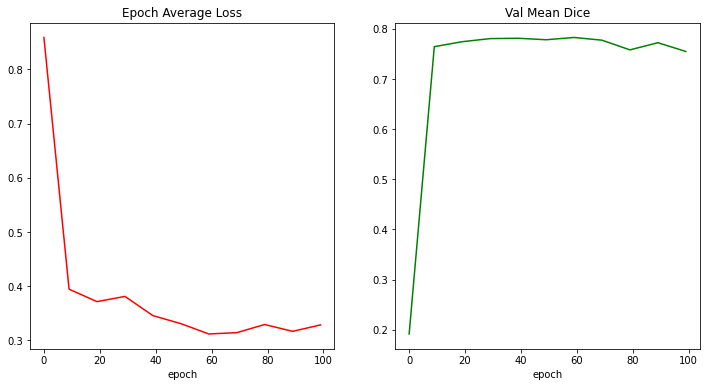

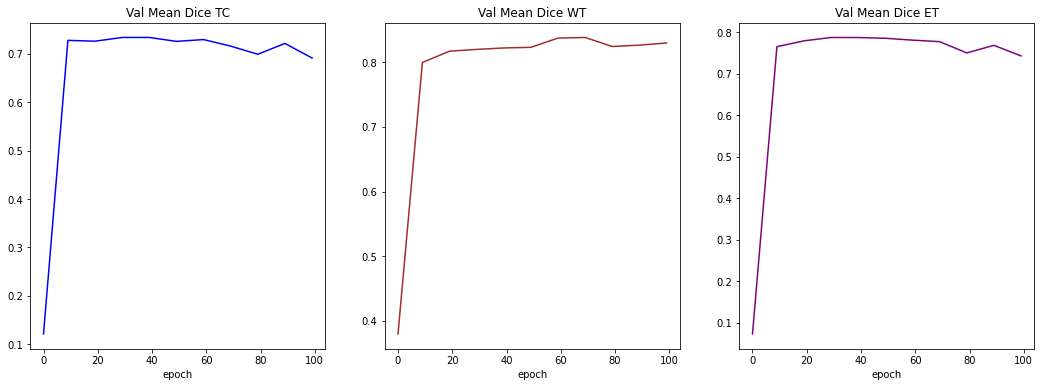

In [14]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
plt.xlabel("epoch")
plt.plot(trains_epoch, loss_epochs, color="red")
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
plt.xlabel("epoch")
plt.plot(trains_epoch, Dices_avg, color="green")
plt.show()
plt.figure("train", (18, 6))
plt.subplot(1, 3, 1)
plt.title("Val Mean Dice TC")
plt.xlabel("epoch")
plt.plot(trains_epoch, Dices_TC, color="blue")
plt.subplot(1, 3, 2)
plt.title("Val Mean Dice WT")
plt.xlabel("epoch")
plt.plot(trains_epoch, Dices_WT, color="brown")
plt.subplot(1, 3, 3)
plt.title("Val Mean Dice ET")
plt.xlabel("epoch")
plt.plot(trains_epoch, Dices_ET, color="purple")
plt.show()

## Create test set dataloader

In [15]:
case_num = "01619"

test_files = [
    {
        "image": [
            os.path.join(
                data_dir,
                "TrainingData/BraTS2021_"
                + case_num
                + "/BraTS2021_"
                + case_num
                + "_flair.nii.gz",
            ),
            os.path.join(
                data_dir,
                "TrainingData/BraTS2021_"
                + case_num
                + "/BraTS2021_"
                + case_num
                + "_t1ce.nii.gz",
            ),
            os.path.join(
                data_dir,
                "TrainingData/BraTS2021_"
                + case_num
                + "/BraTS2021_"
                + case_num
                + "_t1.nii.gz",
            ),
            os.path.join(
                data_dir,
                "TrainingData/BraTS2021_"
                + case_num
                + "/BraTS2021_"
                + case_num
                + "_t2.nii.gz",
            ),
        ],
        "label": os.path.join(
            data_dir,
            "TrainingData/BraTS2021_"
            + case_num
            + "/BraTS2021_"
            + case_num
            + "_seg.nii.gz",
        ),
    }
]

test_transform = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image", "label"]),
        transforms.ConvertToMultiChannelBasedOnBratsClassesd(keys="label"),
        transforms.NormalizeIntensityd(keys="image", nonzero=True, channel_wise=True),
    ]
)

test_ds = data.Dataset(data=test_files, transform=test_transform)

test_loader = data.DataLoader(
    test_ds,
    batch_size=1,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
)

## Load the best saved checkpoint and perform inference 

We select a single case from the validation set and perform inference to compare the model segmentation output with the corresponding label. 

In [18]:
model.load_state_dict(torch.load(os.path.join(root_dir, "model.pt"))["state_dict"])
model.to(device)
model.eval()

model_inferer_test = partial(
    sliding_window_inference,
    roi_size=[roi[0], roi[1], roi[2]],
    sw_batch_size=1,
    predictor=model,
    overlap=0.6,
)


with torch.no_grad():
    for idx, batch_data in enumerate(test_loader):
        image = batch_data["image"].cuda()
        prob = torch.sigmoid(model_inferer_test(image))
        seg = prob[0].detach().cpu().numpy()
        seg = (seg > 0.5).astype(np.int8)
        seg_out = np.zeros((seg.shape[1], seg.shape[2], seg.shape[3]))
        seg_out[seg[1] == 1] = 2
        seg_out[seg[0] == 1] = 1
        seg_out[seg[2] == 1] = 4

## Visualize segmentation output and compare with label

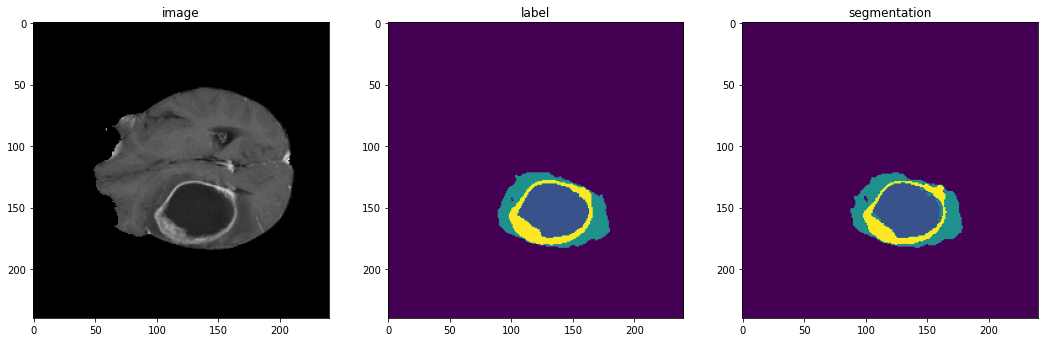

In [23]:
slice_num = 67
img_add = os.path.join(
    data_dir,
    "TrainingData/BraTS2021_" + case_num + "/BraTS2021_" + case_num + "_t1ce.nii.gz",
)
label_add = os.path.join(
    data_dir,
    "TrainingData/BraTS2021_" + case_num + "/BraTS2021_" + case_num + "_seg.nii.gz",
)
img = nib.load(img_add).get_fdata()
label = nib.load(label_add).get_fdata()
plt.figure("image", (18, 6))
plt.subplot(1, 3, 1)
plt.title("image")
plt.imshow(img[:, :, slice_num], cmap="gray")
plt.subplot(1, 3, 2)
plt.title("label")
plt.imshow(label[:, :, slice_num])
plt.subplot(1, 3, 3)
plt.title("segmentation")
plt.imshow(seg_out[:, :, slice_num])
plt.show()

## Cleanup data directory

Remove directory if a temporary was used.

In [21]:
if directory is None:
    shutil.rmtree(root_dir)



In [86]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()